Overview: This project will discuss the relationship between Natural Gas Price Versus Heating Degree Day(HDD) by creating an accurate model using computer science concepts. This experience is relevant to building models that are utilized to predict real world metrics, such as oil future prices. The student will data gathered online to build a model to predict the two metrics, and perform a metanalysis on how accurate the model is.

In [64]:
#Import statements
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from scipy.stats import linregress
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose

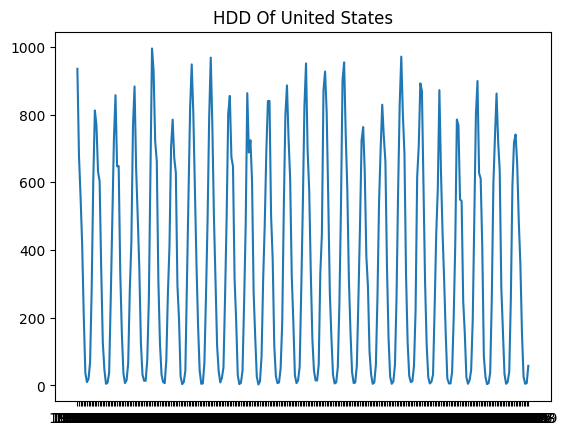

In [65]:
df = pd.read_csv("output.csv")
plt.title('HDD Of United States')
plt.plot(df.Month, df.Data1)

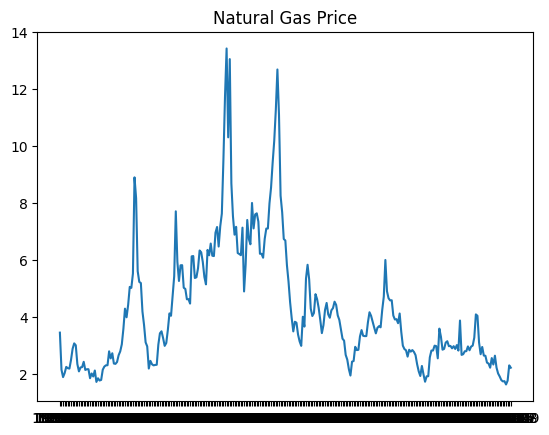

In [66]:
plt.title('Natural Gas Price')
plt.plot(df.Month, df.Data2)

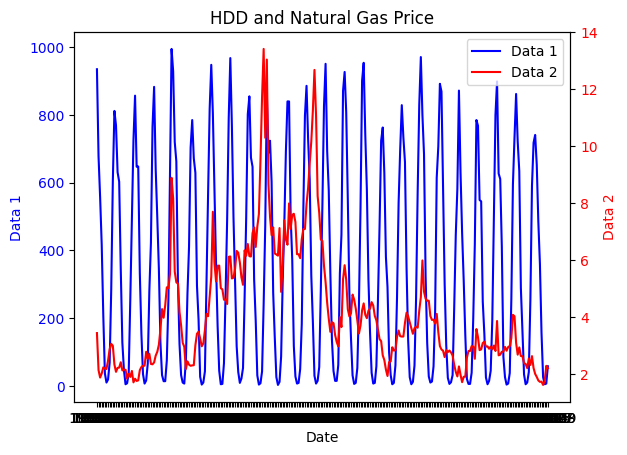

In [67]:
# Plotting the first dataset with its own y-axis
fig, ax1 = plt.subplots()

ax1.plot(df.Month, df.Data1, 'b-', label='Data 1')  # 'bo' for blue points dashes for a line
ax1.set_xlabel('Date')
ax1.set_ylabel('Data 1', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Creating a second y-axis for the second dataset
ax2 = ax1.twinx()  # Shares the same x-axis as ax1

ax2.plot(df.Month, df.Data2, 'r-', label='Data 2')  # 'ro' for red points
ax2.set_ylabel('Data 2', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Displaying legends for both datasets
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')

plt.title('HDD and Natural Gas Price')
plt.show()

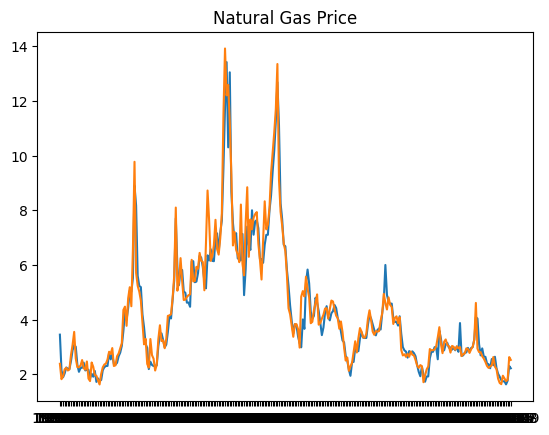

In [68]:
#Regression analysis
plt.title('Natural Gas Price')
plt.plot(df.Month, df.Data2, df.Data3)

In [69]:
slope, intercept, r_value, p_value, std_err = linregress(df.Data1, df.Data2)
r_squared = r_value ** 2

print(f'R-squared value: {r_squared}')

R-squared value: 0.007060356479383214


In [70]:
slope, intercept, r_value, p_value, std_err = linregress(df.Data2, df.Data3)
r_squared = r_value ** 2

print(f'R-squared value: {r_squared}')

R-squared value: 0.9385522612634526


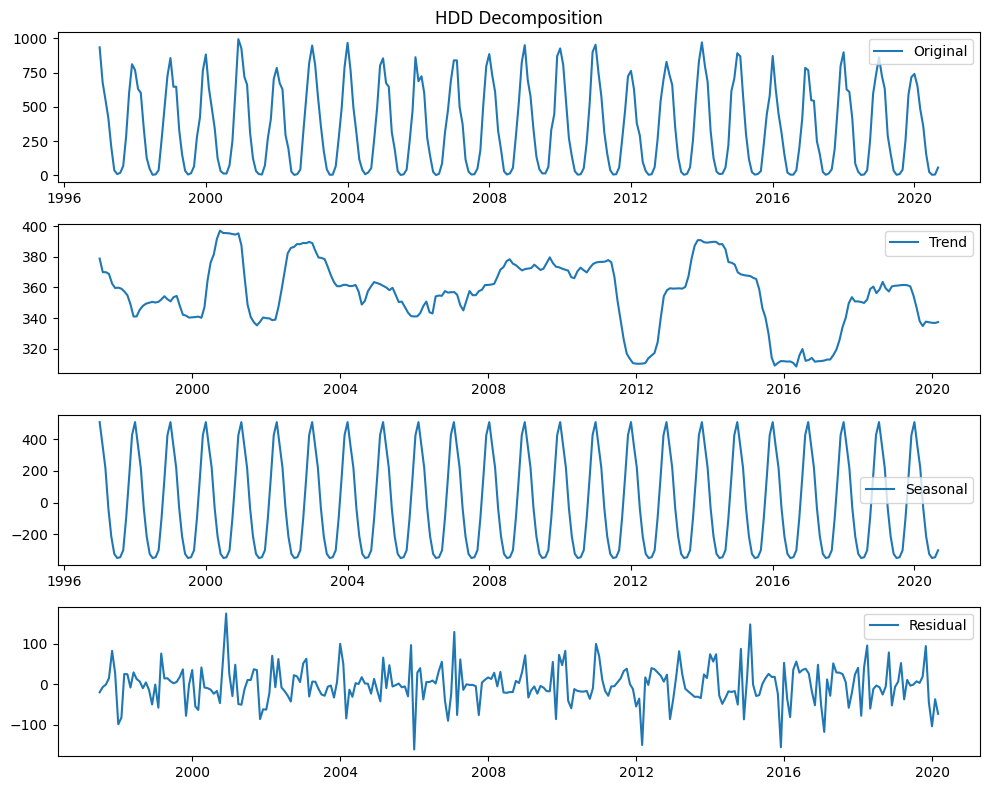

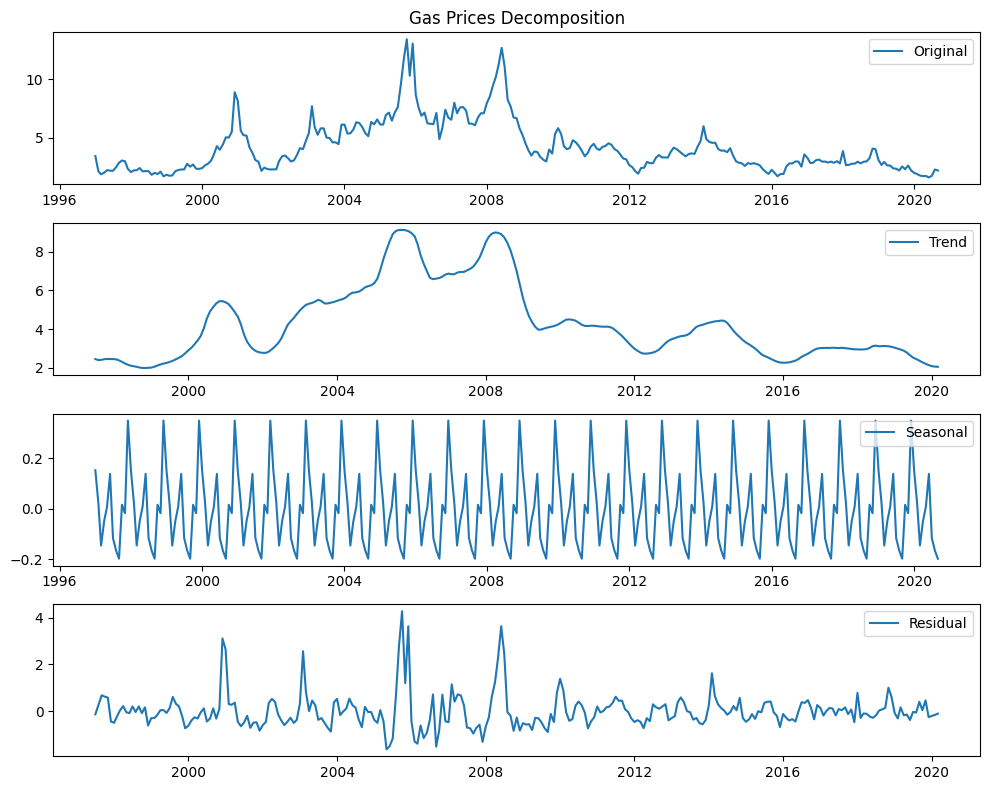

In [71]:
#Seasonal decomposition
df = pd.read_csv("output.csv")

df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Apply seasonal decomposition to HDD
decomposition_hdd = seasonal_decompose(df['Data1'], model='additive', period=12)  # Adjust the period if needed

# Apply seasonal decomposition to Gas Prices
decomposition_gas = seasonal_decompose(df['Data2'], model='additive', period=12)  # Adjust the period if needed

# Plot the decomposed components for HDD
fig, axes = plt.subplots(4, 1, figsize=(10, 8))
axes[0].set_title('HDD Decomposition')
axes[0].plot(df['Data1'], label='Original')
axes[1].plot(decomposition_hdd.trend, label='Trend')
axes[2].plot(decomposition_hdd.seasonal, label='Seasonal')
axes[3].plot(decomposition_hdd.resid, label='Residual')
for ax in axes:
    ax.legend()
plt.tight_layout()
plt.show()

# Plot the decomposed components for Gas Prices
fig, axes = plt.subplots(4, 1, figsize=(10, 8))
axes[0].set_title('Gas Prices Decomposition')
axes[0].plot(df['Data2'], label='Original')
axes[1].plot(decomposition_gas.trend, label='Trend')
axes[2].plot(decomposition_gas.seasonal, label='Seasonal')
axes[3].plot(decomposition_gas.resid, label='Residual')
for ax in axes:
    ax.legend()
plt.tight_layout()
plt.show()


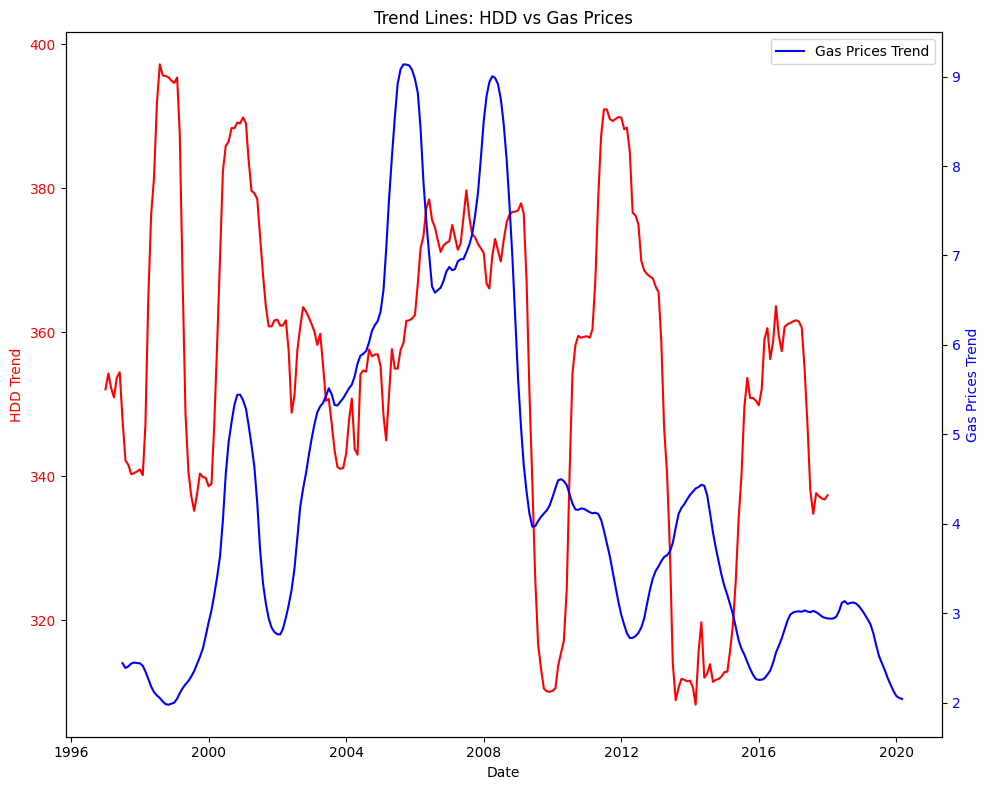

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 253 and the array at index 1 has size 273

In [79]:
# Create subplots with shared x-axis
fig, ax1 = plt.subplots(figsize=(10, 8))

# Define the number of periods (months) to delay to line up the data
delay_periods = 26

# Shift HDD trend by the specified number of periods (delay)
shifted_hdd_trend = decomposition_hdd.trend.shift(-delay_periods)

# Plot HDD Trend on the left y-axis (red)
ax1.plot(df.index, shifted_hdd_trend, color='red', label='HDD Trend')
ax1.set_xlabel('Date')
ax1.set_ylabel('HDD Trend', color='red')
for label in ax1.get_yticklabels():
    label.set_color('red')

# Create a second y-axis for Gas Prices on the right side (blue)
ax2 = ax1.twinx()
ax2.plot(df.index, decomposition_gas.trend, color='blue', label='Gas Prices Trend')
ax2.set_ylabel('Gas Prices Trend', color='blue')
for label in ax2.get_yticklabels():
    label.set_color('blue')

plt.title('Trend Lines: HDD vs Gas Prices')
plt.legend()
plt.tight_layout()
plt.show()

# Calculate linear regression between HDD and Gas Prices trend lines
slope, intercept, r_value, p_value, std_err = linregress(shifted_hdd_trend.dropna(), decomposition_gas.trend.dropna())
r_squared = r_value ** 2
print(f'R-squared value between HDD and Gas Prices trend lines: {r_squared}')